Name:- Karsh Mistry 

In [1]:
!pip install prophet


In [2]:
import pandas as pd

df = pd.read_csv("sales_dataset_2024.csv")
df['Date'] = pd.to_datetime(df['Date'])


In [3]:
from prophet import Prophet

# Aggregate sales per day
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.rename(columns={'Date': 'ds', 'Sales': 'y'})


In [4]:
model = Prophet()
model.fit(daily_sales)


20:30:13 - cmdstanpy - INFO - Chain [1] start processing
20:30:14 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)


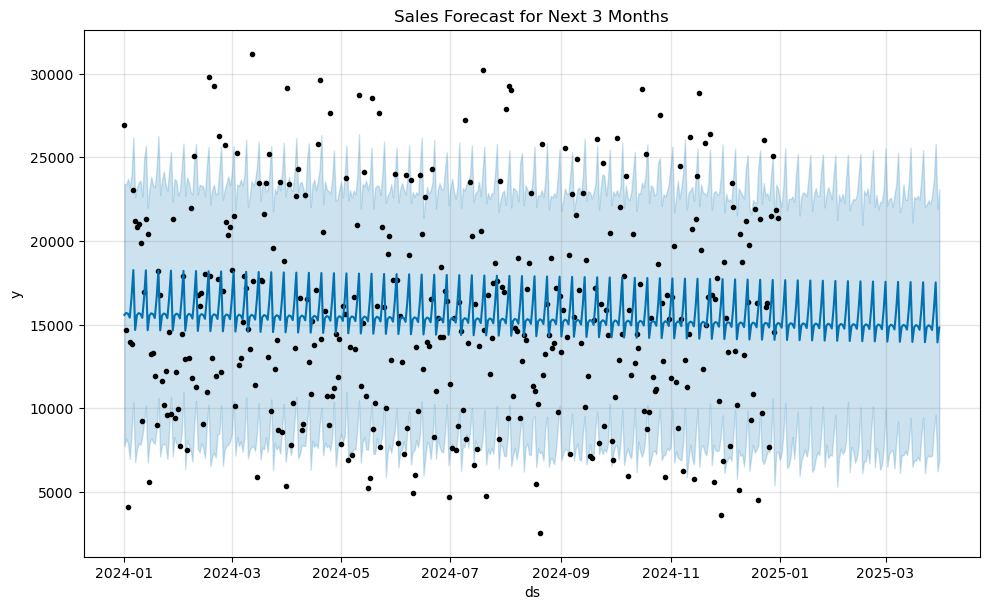

In [6]:
import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.title("Sales Forecast for Next 3 Months")
plt.show()
